# Lab 09 – Polynomial Regression & Model Complexity (MSE Version)
CSCI‑4750/5750: Introduction to Machine Learning – Summer 2025
Tae‑Hyuk (Ted) Ahn

## Learning Goals
- Load and inspect the California Housing dataset.
- Fit baseline *LinearRegression* and *SGDRegressor* models.
- Generate *PolynomialFeatures* and explore bias–variance trade‑off.
- Evaluate models with **Mean Squared Error (MSE)** on train/test sets and via cross‑validation.
- Plot model complexity vs. MSE.
- Reflect on how model capacity affects over‑/under‑fitting.

## Setup
Run the next cell to import libraries, fetch the dataset and create train/test splits.

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Load the California housing dataset
data = fetch_california_housing(as_frame=True)
X_full = data.data
y_full = data.target

# TODO: Inspect the data (head, describe, etc.)
print("=== First few rows of the dataset ===")
print(X_full.head())

print("\n=== Summary statistics of features ===")
print(X_full.describe())

print("\n=== Target (y) – first few values ===")
print(y_full.head())

print("\n=== Target (y) – summary statistics ===")
print(y_full.describe())

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Print dataset shapes
print(f'\nTrain shape: {X_train.shape}, Test shape: {X_test.shape}')


=== First few rows of the dataset ===
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

=== Summary statistics of features ===
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.3333

### 1  Baseline Linear Regression (Normal Equation)
Complete the next cell to fit **LinearRegression** and compute MSE.

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_train = lin_reg.predict(X_train)
y_pred_test  = lin_reg.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse  = mean_squared_error(y_test,  y_pred_test)

print(f'LinearRegression → Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')

LinearRegression → Train MSE: 0.5179, Test MSE: 0.5559


### 2  Gradient Descent with SGDRegressor

In [3]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(loss='squared_error',
                       penalty=None,
                       learning_rate='invscaling',
                       eta0=0.01,
                       max_iter=1000,
                       random_state=42)

sgd_reg.fit(X_train, y_train)

y_pred_train_sgd = sgd_reg.predict(X_train)
y_pred_test_sgd  = sgd_reg.predict(X_test)

train_mse_sgd = mean_squared_error(y_train, y_pred_train_sgd)
test_mse_sgd  = mean_squared_error(y_test,  y_pred_test_sgd)

print(f'SGDRegressor → Train MSE: {train_mse_sgd:.4f}, Test MSE: {test_mse_sgd:.4f}')

SGDRegressor → Train MSE: 0.5286, Test MSE: 0.5506


### 3  Polynomial Regression & Cross‑Validation

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

degrees = [1, 2, 3, 5, 7]
cv_results = {}

for d in degrees:
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=d, include_bias=False)),
        ('linreg', LinearRegression())
    ])
    # Use negative MSE so higher (less negative) is better; convert later
    scores = cross_val_score(model, X_train, y_train,
                             cv=5,
                             scoring='neg_mean_squared_error')
    mse_scores = -scores  # make positive
    cv_results[d] = mse_scores
    print(f'Degree {d}: CV MSE mean={mse_scores.mean():.4f} ± {mse_scores.std():.4f}')

Degree 1: CV MSE mean=0.5193 ± 0.0149
Degree 2: CV MSE mean=10.4483 ± 18.6011
Degree 3: CV MSE mean=336430.6279 ± 654778.3712
Degree 5: CV MSE mean=3215045200602851.0000 ± 6429939483226288.0000
Degree 7: CV MSE mean=190196099748176640.0000 ± 380392198286840128.0000


### 4  Plot Model Complexity vs. CV MSE

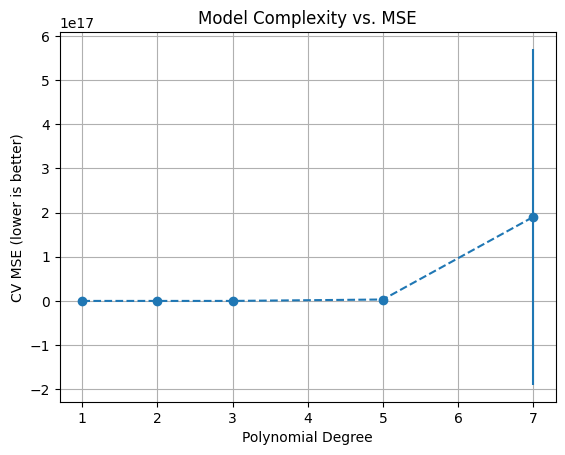

In [5]:
import matplotlib.pyplot as plt
deg = np.array(list(cv_results.keys()))
means = np.array([cv_results[d].mean() for d in deg])
stds  = np.array([cv_results[d].std() for d in deg])

plt.figure()
plt.errorbar(deg, means, yerr=stds, fmt='o--')
plt.xlabel('Polynomial Degree')
plt.ylabel('CV MSE (lower is better)')
plt.title('Model Complexity vs. MSE')
plt.grid(True)
plt.show()

## Reflection
- Which polynomial degree achieved the lowest CV MSE?
- Compare the closed‑form solution and SGD in terms of speed, scalability, and numerical stability.
- Explain how increasing degree changed bias and variance.

<!-- TODO: Write your answers here -->